# Word2Vec 소개

## 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 변환하여 사용하는 방법
- 1안) 자신의 문장으로 단어별 벡터를 생성한다.
- 2안) 미리 트레이닝된 모델의 벡터를 이용한다.
- 3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.<br>
  (보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

### 1안

In [2]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [4]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [5]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [6]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [7]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [8]:
word_vectors_list

[array([-1.59590016e-03, -3.48348040e-05, -1.05179625e-03, -1.22090662e-03,
        -1.02254923e-03,  1.61951839e-03,  1.02699874e-03,  1.14350824e-03,
        -4.29635897e-04,  4.61262607e-05,  5.02926123e-04,  5.39880479e-04,
        -1.26689929e-03, -6.81457808e-04,  6.76289434e-04,  1.12823176e-03,
         9.32376133e-04, -1.33145705e-03,  1.44745654e-03,  1.29897159e-03,
        -3.57424833e-05, -1.16871961e-03,  1.31805241e-03,  5.05221600e-04,
         1.58368098e-03, -9.22173029e-04, -7.43075507e-04,  1.01840787e-03,
         4.05266532e-04,  1.17270194e-03,  5.42218389e-04, -4.10276494e-04,
         1.52635074e-03,  1.24105159e-03, -2.79959728e-04, -1.48727931e-03,
        -1.09642984e-04, -9.49385576e-04, -1.58536306e-03,  2.62036920e-04,
         7.18941563e-04,  5.29009150e-04, -8.76038801e-04,  1.02110289e-03,
         5.03853604e-04,  3.28642811e-04,  1.39207114e-04,  5.52361365e-04,
        -1.00485329e-03,  8.27129581e-04, -1.40593888e-03, -1.02859922e-03,
         6.5

In [9]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.044476353

In [10]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

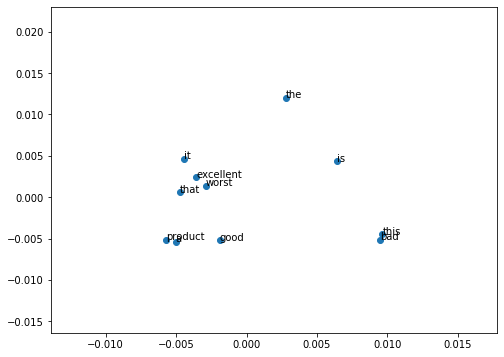

In [11]:
plot_2d_graph(vocabs, xs, ys)

### 3안) 미리 학습된 모델과 병합

In [12]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/01_GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [13]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [14]:
len(word_vectors_list)

11

In [15]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [16]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

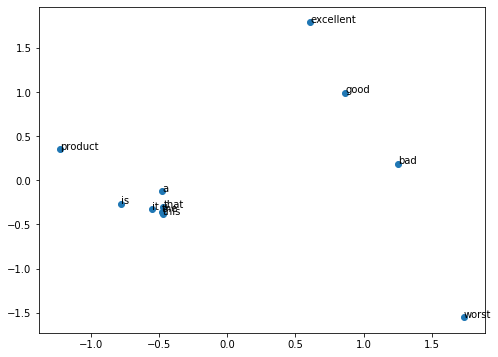

In [17]:
plot_2d_graph(vocabs, xs, ys)

#### 최종 모델 저장

In [18]:
model.save('model/01_word2vec.model')

#### 저장한 모델을 읽어서 사용

In [19]:
model = Word2Vec.load('model/01_word2vec.model')